In [731]:
import pandas as pd
import numpy as np
raw_train_data = pd.read_csv("train.csv")
raw_test_data = pd.read_csv("testdata_with_groundTruth.csv")
train_data = raw_train_data.copy()
test_data = raw_test_data.copy()


In [736]:
print(np.shape(train_data))
print(np.shape(test_data))
train_data.Survived.value_counts()

(891, 12)
(418, 12)


0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

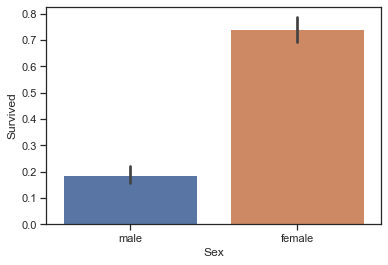

In [737]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(data = train_data, x="Sex", y = "Survived")


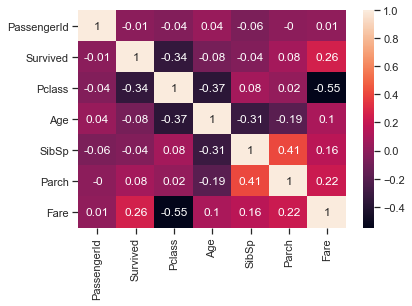

In [738]:
from matplotlib import pyplot as plt

correlation_matrix = train_data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

plt.savefig("Correlation_matrix.png")

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

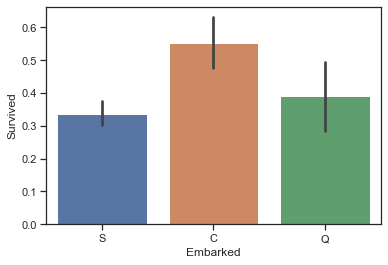

In [739]:
sns.barplot(data = train_data,x="Embarked", y = "Survived")

In [740]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [741]:
test_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [742]:
test_data[test_data["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [743]:
test_data[test_data["PassengerId"] == 1044]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


Remove NA values from all data for Fare and Embarked as only a few samples

In [744]:
train_data = train_data.dropna(axis = 0, subset = ["Embarked"])
#test_data = test_data.dropna(axis = 0, subset = ["Fare"])
train_data["Family"] = train_data["SibSp"] + train_data["Parch"] + 1
test_data["Family"] = test_data["SibSp"] + test_data["Parch"] + 1

In [745]:
fares = train_data.groupby(["Pclass","Family"]).median()["Fare"]

fares_dict = dict(fares[3])

In [746]:
test_data["Fare"] = test_data["Fare"].fillna(test_data["Family"].map(fares_dict))

Investgiate if cabins with NA value correlated with survival

In [747]:
has_cabin = list()
train_data["Cabin"] = train_data["Cabin"].fillna(0)

for n in train_data["Cabin"]:
    if n==0:
        has_cabin.append(0)
    else:
        has_cabin.append(1)

train_data["Has_Cabin"] = has_cabin

Create Has_Cabin feature for test data

In [748]:
has_cabin = list()
test_data["Cabin"] = test_data["Cabin"].fillna(0)

for n in test_data["Cabin"]:
    if n==0:
        has_cabin.append(0)
    else:
        has_cabin.append(1)

test_data["Has_Cabin"] = has_cabin

<AxesSubplot:xlabel='Has_Cabin', ylabel='Survived'>

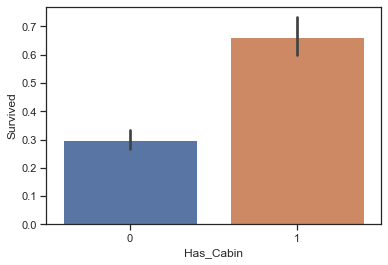

In [749]:
sns.barplot(data = train_data,x="Has_Cabin", y="Survived")

Split out title from Name

In [750]:
titles_train = list()
full_stop = "."
for name in train_data["Name"]:
    splits = name.split()
    for word in splits:
        if full_stop in word:
            titles_train.append(word)
            break
    

train_data["Title"] = titles_train


In [751]:
titles_test = list()
full_stop = "."
for name in test_data["Name"]:
    splits = name.split()
    for word in splits:
        if full_stop in word:
            titles_test.append(word)
            break
    

test_data["Title"] = titles_test

In [752]:
title_value = ("Mr","Mrs","Miss","Master","Nobility","Rev","Dr","Miss","Miss","Military","Nobility","Nobility","Miss","Military",
               "Military","Nobility","Nobility","Nobility","Nobility")
title_key = ('Mr.','Mrs.','Miss.','Master.','Don.','Rev.','Dr.','Mme.','Ms.','Major.',
 'Lady.','Sir.', 'Mlle.', 'Col.', 'Capt.', 'Countess.', 'Jonkheer.', 'Dona.')

title_dict = zip(title_key,title_value)

title_dict = dict(title_dict)

train_data["title_grouped"] = train_data["Title"].map(title_dict)
test_data["title_grouped"] = test_data["Title"].map(title_dict)

In [753]:
title_dict

{'Mr.': 'Mr',
 'Mrs.': 'Mrs',
 'Miss.': 'Miss',
 'Master.': 'Master',
 'Don.': 'Nobility',
 'Rev.': 'Rev',
 'Dr.': 'Dr',
 'Mme.': 'Miss',
 'Ms.': 'Miss',
 'Major.': 'Military',
 'Lady.': 'Nobility',
 'Sir.': 'Nobility',
 'Mlle.': 'Miss',
 'Col.': 'Military',
 'Capt.': 'Military',
 'Countess.': 'Nobility',
 'Jonkheer.': 'Nobility',
 'Dona.': 'Nobility'}

<AxesSubplot:xlabel='title_grouped', ylabel='Survived'>

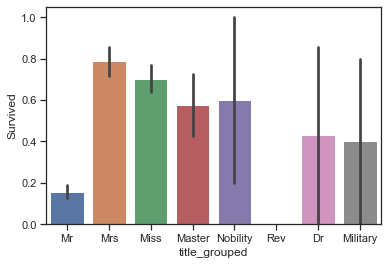

In [754]:
sns.barplot(data = train_data,x="title_grouped", y="Survived")

<AxesSubplot:xlabel='Family', ylabel='Survived'>

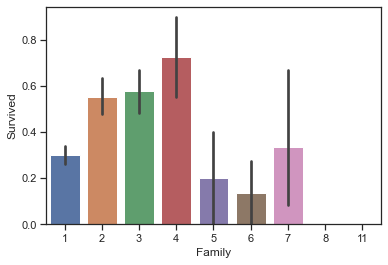

In [755]:
sns.barplot(data = train_data,x="Family", y="Survived")

In [756]:
#age_by_title = train_data.groupby(["title_grouped","Parch"]).mean()["Age"]

#train_data = train_data.join(age_by_title.loc["Miss",:],on=["title_grouped","Parch"],rsuffix = "avg")
#test_data = test_data.join(age_by_title.loc["Miss",:],on=["title_grouped","Parch"],rsuffix = "avg")

#train_data["Age"] = train_data["Age"].fillna(train_data["Ageavg"])
#test_data["Age"] = test_data["Age"].fillna(test_data["Ageavg"])

#train_data = train_data.drop(["Ageavg"],axis=1)
#test_data = test_data.drop(["Ageavg"],axis=1)

age_by_title = train_data.groupby(["title_grouped"]).median()["Age"]

train_data = train_data.join(age_by_title,on=["title_grouped"],rsuffix = "_avg")
test_data = test_data.join(age_by_title,on=["title_grouped"],rsuffix = "_avg")

train_data["Age"] = train_data["Age"].fillna(train_data["Age_avg"])
test_data["Age"] = test_data["Age"].fillna(test_data["Age_avg"])

train_data = train_data.drop(["Age_avg"],axis=1)
test_data = test_data.drop(["Age_avg"],axis=1)


In [757]:
#train_data["Age"] = train_data["Age"].fillna(train_data["Ageavg"])

In [758]:
#test_data["Age"] = test_data["Age"].fillna(test_data["Ageavg"])
#test_data["Age"] = test_data["Age"].fillna(test_data["Title"].map(age_by_title))

In [759]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Family           0
Has_Cabin        0
Title            0
title_grouped    0
dtype: int64

In [760]:
test_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Family           0
Has_Cabin        0
Title            0
title_grouped    0
dtype: int64

In [761]:
train_data["Fare_pp"] = train_data["Fare"]/(train_data["Family"])
test_data["Fare_pp"] = test_data["Fare"]/(test_data["Family"])

In [762]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
features = ["Pclass","SibSp","Parch","Sex","Embarked","title_grouped","Has_Cabin","Fare_pp"]
#features = ["Pclass","SibSp","Parch","Sex","Embarked","Has_Cabin","Age","title_grouped"]
#convert nominal categorical features to numeric, removing first column to reduce collinearity and take features
X_train = pd.get_dummies(train_data[features], drop_first = True)
X_test = pd.get_dummies(test_data[features], drop_first = True)

X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)


#create y with class feature
y_train = train_data["Survived"]
y_test = test_data["Survived"]

In [763]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

#lr_pipe = make_pipeline(StandardScaler(),LogisticRegression(penalty = "l2",random_state = 1,max_iter = 500))

lr_pipe = LogisticRegression(penalty = "l2",random_state = 1,max_iter = 500)

params = [{'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}]

lr_gs = GridSearchCV(estimator = lr_pipe,
                     param_grid = params,
                     cv = 10)

lr_gs.fit(X_train_scaled,y_train)

print(lr_gs.best_score_)
print(lr_gs.best_params_)

lr_model = lr_gs.best_estimator_
lr_model.fit(X_train_scaled,y_train)
print('Test accuracy: %.3f' % lr_model.score(X_test_scaled, y_test))

                        

0.8223186925434117
{'C': 0.1}
Test accuracy: 0.775


In [764]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix


score = cross_val_score(lr_model,X_train_scaled,y_train,cv=10)
print('Training accuracy: %.3f +/- %.3f' % (np.mean(score),
                                           np.std(score)))

y_pred = lr_model.predict(X_test_scaled)

cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
print(cm)
print('Precision: %.3f' % precision_score(y_test,y_pred))
print('Recall: %.3f' % recall_score(y_test,y_pred))
print('F1: %.3f' % f1_score(y_test,y_pred))
lr_misclassified_index = y_test!=y_pred

Training accuracy: 0.822 +/- 0.037
[[207  53]
 [ 41 117]]
Precision: 0.688
Recall: 0.741
F1: 0.713


Mr          46
Miss        24
Mrs         15
Master       8
Military     1
Name: title_grouped, dtype: int64

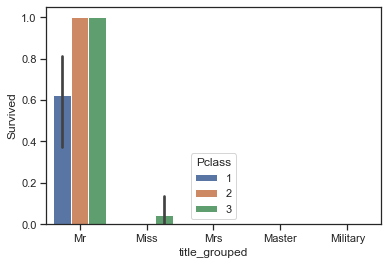

In [765]:
misclassified_data = test_data[lr_misclassified_index]

lr_id = test_data.PassengerId[lr_misclassified_index].values

sns.barplot(data = misclassified_data,x="title_grouped",y="Survived",hue = "Pclass")

misclassified_data["title_grouped"].value_counts()



In [766]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

#svc_pipe = make_pipeline(StandardScaler(),SVC(random_state=1, max_iter = 5000))
svc_pipe = SVC(random_state=1, max_iter = 5000)
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
#param_grid = [{"svc__C" : param_range,
#             "svc__kernel": ['linear']},
#             {"svc__C" : param_range,
#               'svc__gamma': param_range,
#               'svc__kernel': ['rbf']}]

param_grid = [{"C" : param_range,
             "kernel": ['linear']},
             {"C" : param_range,
               'gamma': param_range,
               'kernel': ['rbf']}]

gs = GridSearchCV(estimator = svc_pipe,
                 param_grid = param_grid,
                 scoring = "accuracy",
                 cv = 10,
                 n_jobs = 2)

gs = gs.fit(X_train_scaled,y_train)
print(gs.best_score_)
print(gs.best_params_)

0.8335418794688456
{'C': 10.0, 'gamma': 0.01, 'kernel': 'rbf'}


In [767]:
svm_model = gs.best_estimator_
#svm_model = make_pipeline(StandardScaler(),SVC(random_state=1, max_iter = 4000, C=10,gamma=0.1,kernel="rbf"))
svm_model.fit(X_train_scaled,y_train)

score = cross_val_score(svm_model,X_train_scaled,y_train,cv=10)
print('Training accuracy: %.3f +/- %.3f' % (np.mean(score),
                                           np.std(score)))

print('Test accuracy: %.3f' % svm_model.score(X_test_scaled, y_test))

y_pred = svm_model.predict(X_test_scaled)

cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
print(cm)
print('Precision: %.3f' % precision_score(y_test,y_pred))
print('Recall: %.3f' % recall_score(y_test,y_pred))
print('F1: %.3f' % f1_score(y_test,y_pred))
svm_misclassified_index = y_test!=y_pred

Training accuracy: 0.834 +/- 0.038
Test accuracy: 0.780
[[211  49]
 [ 43 115]]
Precision: 0.701
Recall: 0.728
F1: 0.714


Mr          42
Miss        26
Mrs         14
Master       8
Dr           1
Military     1
Name: title_grouped, dtype: int64

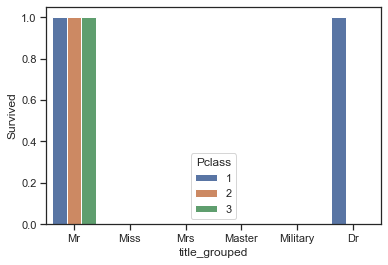

In [768]:
misclassified_data = test_data[svm_misclassified_index]

svm_id = test_data.PassengerId[svm_misclassified_index].values

sns.barplot(data = misclassified_data,x="title_grouped",y="Survived",hue = "Pclass")

misclassified_data["title_grouped"].value_counts()

In [769]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(criterion='gini',
                              max_depth=4,
                              random_state=1)
tree.fit(X_train, y_train)

print(tree.score(X_train,y_train))
Y_pred = tree.predict(X_test)
print(accuracy_score(y_test,Y_pred))

0.8380202474690663
0.7727272727272727


In [770]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion = "gini",random_state=1)
param_grid = [{"n_estimators": [10,25,50,75,90,100],
              "max_depth": [1,2,3,4,5,6,7,8,None],
              "criterion": ["gini","entropy"]}]
rf_gs = GridSearchCV(estimator = rf,
                    param_grid = param_grid,
                    scoring = 'accuracy',
                    cv=10)
rf_gs.fit(X_train,y_train)
print(rf_gs.best_score_)
print(rf_gs.best_params_)


0.8256894790602656
{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 75}


In [771]:
from sklearn.metrics import confusion_matrix

rf_model = rf_gs.best_estimator_
#rf = RandomForestClassifier(random_state=1, n_estimators = 100, max_depth = 7)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)

score = cross_val_score(rf_model,X_train,y_train,cv=10)
print('Training accuracy: %.3f +/- %.3f' % (np.mean(score),
                                           np.std(score)))

print('Test accuracy: %.3f' % rf_model.score(X_test, y_test))
cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
print(cm)
print('Precision: %.3f' % precision_score(y_test,y_pred))
print('Recall: %.3f' % recall_score(y_test,y_pred))
print('F1: %.3f' % f1_score(y_test,y_pred))
rf_misclassified_index = y_test!=y_pred

Training accuracy: 0.826 +/- 0.037
Test accuracy: 0.785
[[217  43]
 [ 47 111]]
Precision: 0.721
Recall: 0.703
F1: 0.712


title_grouped  Pclass  Survived
Mr             3       1           24
Miss           3       0           18
Mr             1       1           12
Mrs            3       0            8
Master         3       0            8
Mr             2       1            6
Mrs            2       0            5
Miss           3       1            5
Mrs            1       0            1
Miss           2       0            1
               1       0            1
Military       1       0            1
dtype: int64

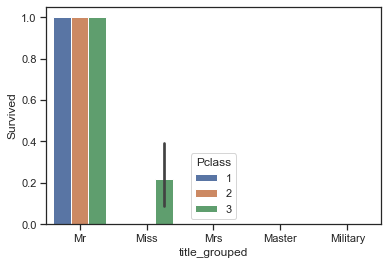

In [772]:
misclassified_data = test_data[rf_misclassified_index]

rf_id = test_data.PassengerId[rf_misclassified_index].values

sns.barplot(data = misclassified_data,x="title_grouped",y="Survived",hue = "Pclass")

misclassified_data[["title_grouped","Pclass","Survived"]].value_counts()

In [773]:
importances = rf_model.feature_importances_
print(importances)
print(X_train.columns[:])

[0.09546761 0.05229463 0.02635632 0.0529022  0.14002361 0.20670373
 0.01391709 0.01828059 0.01939528 0.00131658 0.07310807 0.24023714
 0.0525188  0.00152043 0.00595792]
Index(['Pclass', 'SibSp', 'Parch', 'Has_Cabin', 'Fare_pp', 'Sex_male',
       'Embarked_Q', 'Embarked_S', 'title_grouped_Master',
       'title_grouped_Military', 'title_grouped_Miss', 'title_grouped_Mr',
       'title_grouped_Mrs', 'title_grouped_Nobility', 'title_grouped_Rev'],
      dtype='object')


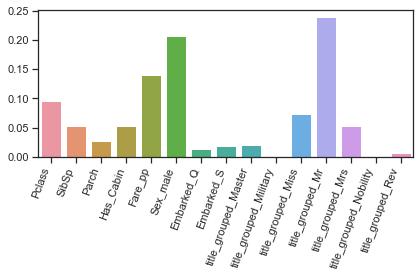

In [774]:
sns.barplot(x = X_train.columns[:], y = importances)
plt.xticks(rotation=70,horizontalalignment='right')
plt.tight_layout()

In [775]:
from sklearn.neighbors import KNeighborsClassifier

#pipe_kn = make_pipeline(StandardScaler(), KNeighborsClassifier(metric = "minkowski"))
pipe_kn = KNeighborsClassifier(metric = "minkowski")

#param_grid = [{"kneighborsclassifier__p": [1,2],
#              "kneighborsclassifier__n_neighbors": [1,2,3,4,5,6]}]

param_grid = [{"p": [1,2],
              "n_neighbors": [1,2,3,4,5,6]}]

kn_gs = GridSearchCV(estimator = pipe_kn,
                    param_grid = param_grid,
                    scoring = 'accuracy',
                    cv=10)

kn_gs.fit(X_train_scaled,y_train)
print(kn_gs.best_score_)
print(kn_gs.best_params_)

0.8222931562819203
{'n_neighbors': 6, 'p': 2}


In [776]:
kn_model = kn_gs.best_estimator_
kn_model.fit(X_train_scaled,y_train)

score = cross_val_score(kn_model,X_train_scaled,y_train,cv=10)
print('Training accuracy: %.3f +/- %.3f' % (np.mean(score),
                                           np.std(score)))

print('Test accuracy: %.3f' % kn_model.score(X_test_scaled, y_test))

y_pred = kn_model.predict(X_test_scaled)
cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
print(cm)

print('Precision: %.3f' % precision_score(y_test,y_pred))
print('Recall: %.3f' % recall_score(y_test,y_pred))
print('F1: %.3f' % f1_score(y_test,y_pred))

Training accuracy: 0.822 +/- 0.047
Test accuracy: 0.754
[[213  47]
 [ 56 102]]
Precision: 0.685
Recall: 0.646
F1: 0.664


Implement voting ensemble classifier

In [783]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

lr = LogisticRegression(penalty = "l2",C = 0.01, random_state = 1)
rf = RandomForestClassifier(n_estimators = 10,max_depth = 3, random_state=1)
kn = KNeighborsClassifier(n_neighbors = 1, p =2, metric = "minkowski")


ensem_classifier = VotingClassifier(estimators=[('lr', lr), ('rf', rf), ('kn',kn)], voting='soft')

ensem_classifier.fit(X_train_scaled,y_train)

params = {'lr__C': [0.001, 0.01, 1, 10,100],
         'rf__n_estimators': [10,25,50,75,90,100],
         'rf__max_depth': [1,2,3,4,5,6,7,8],
         'kn__n_neighbors': [1,2,3,4,5],
         'kn__p': [1,2],
         'voting':['soft','hard']}

ensem_grid = RandomizedSearchCV(estimator = ensem_classifier,
                                param_distributions = params,
                                cv = 10,
                                scoring = 'accuracy',
                                random_state = 1)
ensem_grid.fit(X_train_scaled,y_train)
print(ensem_grid.best_score_)
print(ensem_grid.best_params_)

0.838061797752809
{'voting': 'soft', 'rf__n_estimators': 90, 'rf__max_depth': 4, 'lr__C': 0.01, 'kn__p': 1, 'kn__n_neighbors': 5}


In [792]:
lr = LogisticRegression(penalty = "l2",C = 0.01, random_state = 1)
rf = RandomForestClassifier(n_estimators = 90,max_depth = 4, random_state=1)
kn = KNeighborsClassifier(n_neighbors = 5, p =1, metric = "minkowski")

ensem_classifier = VotingClassifier(estimators=[('lr', lr), ('rf', rf), ('kn', kn)], voting='soft')

ensem_classifier.fit(X_train_scaled,y_train)

y_pred = ensem_classifier.predict(X_test_scaled)

print(ensem_classifier.score(X_test_scaled,y_test))

score = cross_val_score(ensem_classifier,X_train_scaled,y_train,cv=10)
print('Training accuracy: %.3f +/- %.3f' % (np.mean(score),
                                           np.std(score)))

cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
print(cm)
print('Precision: %.3f' % precision_score(y_test,y_pred))
print('Recall: %.3f' % recall_score(y_test,y_pred))
print('F1: %.3f' % f1_score(y_test,y_pred))
vc_misclassified_index = y_test!=y_pred
vc_id = test_data.PassengerId[vc_misclassified_index].values

0.7894736842105263
Training accuracy: 0.838 +/- 0.041
[[213  47]
 [ 41 117]]
Precision: 0.713
Recall: 0.741
F1: 0.727


title_grouped  Pclass  Survived
Mr             3       1           24
Miss           3       0           24
Mr             1       1           12
Mrs            3       0            9
Mr             2       1            6
Mrs            2       0            5
Master         3       1            2
                       0            2
Mrs            1       0            1
Mr             1       0            1
Miss           3       1            1
               2       0            1
               1       0            1
Military       1       0            1
dtype: int64

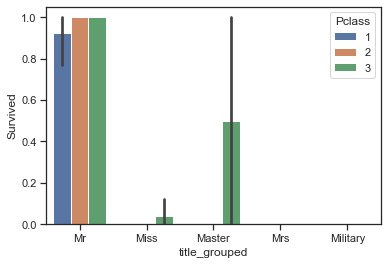

In [592]:
misclassified_data = test_data[vc_misclassified_index]

sns.barplot(data = misclassified_data,x="title_grouped",y="Survived",hue = "Pclass")

misclassified_data[["title_grouped","Pclass","Survived"]].value_counts()



In [798]:
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(2)
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout


dl_model = Sequential()
dl_model.add(Dense(15, input_dim=15, activation = 'relu'))
dl_model.add(Dense(15, activation = 'relu'))
dl_model.add(Dropout(0.1))
dl_model.add(Dense(8, activation = 'relu'))
dl_model.add(Dense(4, activation = 'relu'))
dl_model.add(Dense(1, activation = 'sigmoid'))

dl_model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

dl_model.summary()

dl_model.fit(X_train_scaled, y_train, epochs=20, batch_size=50,validation_split =0.2)


Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_271 (Dense)            (None, 15)                240       
_________________________________________________________________
dense_272 (Dense)            (None, 15)                240       
_________________________________________________________________
dropout_28 (Dropout)         (None, 15)                0         
_________________________________________________________________
dense_273 (Dense)            (None, 8)                 128       
_________________________________________________________________
dense_274 (Dense)            (None, 4)                 36        
_________________________________________________________________
dense_275 (Dense)            (None, 1)                 5         
Total params: 649
Trainable params: 649
Non-trainable params: 0
_______________________________________________________

In [799]:
from sklearn import metrics
y_pred = dl_model.predict_classes(X_test_scaled)
print('Test Accuracy:',accuracy_score(y_true = y_test,y_pred = y_pred))
print(metrics.classification_report(y_true=y_test,y_pred=y_pred))

y_pred_train  = dl_model.predict_classes(X_train_scaled)

print('Training Accuracy:',accuracy_score(y_true = y_train,y_pred = y_pred_train))
print('Precision: %.3f' % precision_score(y_test,y_pred))
print('Recall: %.3f' % recall_score(y_test,y_pred))

cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
print(cm)

y_pred = y_pred.ravel()
dl_misclassified_index = y_test!=y_pred
dl_id = test_data.PassengerId[dl_misclassified_index].values

Test Accuracy: 0.784688995215311
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       260
           1       0.71      0.73      0.72       158

    accuracy                           0.78       418
   macro avg       0.77      0.77      0.77       418
weighted avg       0.79      0.78      0.79       418

Training Accuracy: 0.8391451068616423
Precision: 0.710
Recall: 0.728
[[213  47]
 [ 43 115]]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Has_Cabin,Title,title_grouped,Fare_pp
5,897,1,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,0,S,1,0,Mr.,Mr,9.225000
6,898,0,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,0,Q,1,0,Miss.,Miss,7.629200
7,899,1,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,0,S,3,0,Mr.,Mr,9.666667
23,915,1,1,"Williams, Mr. Richard Norris II",male,21.0,0,1,PC 17597,61.3792,0,C,2,0,Mr.,Mr,30.689600
33,925,0,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,35.0,1,2,W./C. 6607,23.4500,0,S,4,0,Mrs.,Mrs,5.862500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,1284,0,3,"Abbott, Master. Eugene Joseph",male,13.0,0,2,C.A. 2673,20.2500,0,S,3,0,Master.,Master,6.750000
394,1286,1,3,"Kink-Heilmann, Mr. Anton",male,29.0,3,1,315153,22.0250,0,S,5,0,Mr.,Mr,4.405000
405,1297,1,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C,1,1,Mr.,Mr,13.862500
410,1302,0,3,"Naughton, Miss. Hannah",female,21.0,0,0,365237,7.7500,0,Q,1,0,Miss.,Miss,7.750000


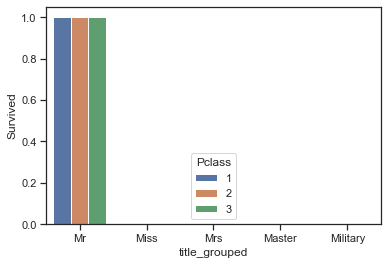

In [795]:
misclassified_data = test_data[test_data["PassengerId"].isin(vc_id)]

misclassified_data = misclassified_data[misclassified_data["PassengerId"].isin(rf_id)]

misclassified_data = misclassified_data[misclassified_data["PassengerId"].isin(lr_id)]

misclassified_data = misclassified_data[misclassified_data["PassengerId"].isin(svm_id)]

misclassified_data = misclassified_data[misclassified_data["PassengerId"].isin(dl_id)]

misclassified_data[["title_grouped","Pclass","Survived"]].value_counts()

misclassified_titles = misclassified_data[["title_grouped"]].value_counts()

sns.barplot(data = misclassified_data,x="title_grouped",y="Survived",hue="Pclass")

misclassified_data

[Text(0, 0.5, '% of Total Misclassfied')]

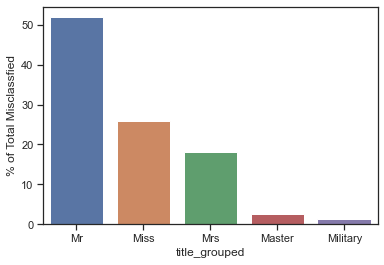

In [794]:
sns.barplot(data = misclassified_df,x="title_grouped",y="perc_of_total").set(ylabel ="% of Total Misclassfied")